In [ ]:
#import required modules
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
#load the csv file
df = pd.read_csv('Trainbm.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
#stats of the data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
#check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#check for categorical attributes
cat_col = []
for x in df.dtypes.index:
  if df.dtypes[x] == 'object':
    cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
#print the categorical columns
for col in cat_col:
  print(col)
  print(df[col].value_counts())
  print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [ ]:
#fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = "Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [ ]:
#info of missing values
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

Fill the missing values with mean for continuous data and with mode for categorical data.

In [ ]:
for i, item in enumerate(df['Item_Weight']):
  if miss_bool[i]:
    if item in item_weight_mean:
      df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
    else:
      df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [ ]:
df['Item_Weight'].isnull().sum()

0

In [ ]:
outlet_size_mode = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
df["Outlet_Size"].isnull()

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [ ]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [ ]:
df['Outlet_Type'].isnull().sum()

0

In [ ]:
sum(df['Item_Visibility'] == 0)

526

In [ ]:
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace = True)

In [ ]:
df['Item_Visibility'].isnull().sum()

0

In [ ]:
#combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Creation of new attributes
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [ ]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD': 'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [ ]:
df.loc[df['New_Item_Type']== 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [ ]:
#create small values for establishment years
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [ ]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [ ]:
#log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

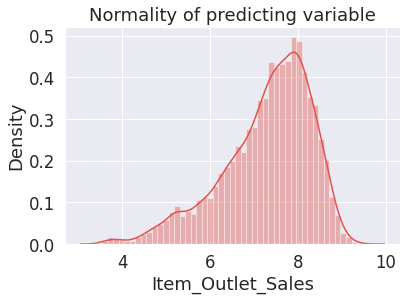

In [ ]:
p = sns.distplot(df['Item_Outlet_Sales'],kde=True)
p = plt.title('Normality of predicting variable')

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
  df[col] = le.fit_transform(df[col])

In [ ]:
#Onehot encoding
df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
#dropping dummy columns of one type
x = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Fat_Content_2', 'Outlet_Size_2', 'Outlet_Location_Type_2', 'Outlet_Type_2', 'New_Item_Type_2'])

In [ ]:
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1
0,9.300,0.016047,4,249.8092,8.225808,14,9,1,0,0,1,1,0,0,1,0,0,1
1,5.920,0.019278,14,48.2692,6.096776,4,3,0,0,0,1,0,0,0,0,0,1,0
2,17.500,0.016760,10,141.6180,7.648868,14,9,1,0,0,1,1,0,0,1,0,0,1
3,19.200,0.066132,6,182.0950,6.597664,15,0,0,0,0,0,0,0,1,0,0,0,1
4,8.930,0.066132,9,53.8614,6.903451,26,1,0,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,7.929984,26,1,1,0,1,0,0,0,0,1,0,0,1
8519,8.380,0.046982,0,108.1570,6.310436,11,7,0,0,0,0,0,1,0,1,0,0,1
8520,10.600,0.035186,8,85.1224,7.085159,9,6,0,1,0,0,0,1,0,1,0,0,0
8521,7.210,0.145221,13,103.1332,7.521100,4,3,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
target_name="Item_Outlet_Sales"
y = x[target_name]
X = x.drop(target_name, axis=1)

In [ ]:
x.shape

(8523, 18)

In [ ]:
y.shape

(8523,)

We will use the feature selection method by backward elimination.It is used to remove those features that do not have a significant effect on the dependent variable.
We need to select the significance level to stay in the model (SL=0.05)
Now we will remove all those predictor variable from our data which has high p value.

**Feature Selection**

In [ ]:
#add a column of ones 
x1 = np.append(arr = np.ones((8523, 1)).astype(int), values = X, axis = 1)

In [ ]:
x1.shape

(8523, 18)

In [ ]:
X.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1
0,9.30,0.016047,4,249.8092,14,9,1,0,0,1,1,0,0,1,0,0,1
1,5.92,0.019278,14,48.2692,4,3,0,0,0,1,0,0,0,0,0,1,0
2,17.50,0.016760,10,141.6180,14,9,1,0,0,1,1,0,0,1,0,0,1
3,19.20,0.066132,6,182.0950,15,0,0,0,0,0,0,0,1,0,0,0,1
4,8.93,0.066132,9,53.8614,26,1,0,1,1,0,0,0,0,1,0,0,0


In [ ]:
x1

array([[1.00000000e+00, 9.30000000e+00, 1.60473010e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.92000000e+00, 1.92782160e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.75000000e+01, 1.67600750e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.00000000e+00, 1.06000000e+01, 3.51862710e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 7.21000000e+00, 1.45220646e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.48000000e+01, 4.48782800e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
#choose a significance level usually 0.05, if p > 0.05
#for the highest values parameter, remove that value
x_opt = x1[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]
x_opt.shape

(8523, 18)

In [ ]:
#constant 0th column
x_opt[:, 0]

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
x_opt[:, 1]     #similarly, we can check other columns

array([ 9.3 ,  5.92, 17.5 , ..., 10.6 ,  7.21, 14.8 ])

In [ ]:
import statsmodels.api as sm

In [ ]:
ols = sm.OLS(endog = y, exog = x_opt).fit()

In [ ]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1371.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        04:52:39   Log-Likelihood:                -6789.0
No. Observations:                8523   AIC:                         1.361e+04
Df Residuals:                    8506   BIC:                         1.373e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8595      0.078     62.385      0.000       4.707       5.012
x1            -0.0007      0.001     -0.543      0.587      -0.003       0.002
x2            -0.0460      0.126     -0.366      0.714      -0.292       0.200
x3             0.0006      0.001      0.431      0.667      -0.002       0.004
x4             0.0083   9.37e-05     88.390      0.000       0.008       0.008
x5            -0.0820      0.023     -3.591      0.000      -0.127      -0.037
x6             0.0675      0.022      3.107      0.002       0.025       0.110
x7            -0.0147      0.013     -1.093      0.275      -0.041       0.012
x8             1.6158      0.029     56.173      0.000       1.559       1.672
x9             2.1002      0.591      3.556      0.000       0.943       3.258
x10           -0.1866      0.072     -2.609      0.009      -0.327      -0.046
x11            0.8263      0.215      3.836      0.000       0.404       1.249
x12            0.4509      0.115      3.922      0.000       0.226       0.676
x13           -0.8639      0.251     -3.440      0.001      -1.356      -0.372
x14           -0.2012      0.119     -1.696      0.090      -0.434       0.031
x15            2.5426      0.506      5.020      0.000       1.550       3.535
x16            1.6134      0.031     52.163      0.000       1.553       1.674
x17            1.6303      0.027     60.437      0.000       1.577       1.683
==============================================================================
Omnibus:                      821.693   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1149.640
Skew:                          -0.771   Prob(JB):                    2.29e-250
Kurtosis:                       3.926   Cond. No.                     7.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.12e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

now the 1st value which has p>0.05 is x1, so first remove x1



In [ ]:
x_opt1 = x1[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]
x_opt1.shape

(8523, 17)

In [ ]:
ols = sm.OLS(endog = y, exog = x_opt1).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1462.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        04:52:39   Log-Likelihood:                -6789.2
No. Observations:                8523   AIC:                         1.361e+04
Df Residuals:                    8507   BIC:                         1.372e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8522      0.077     63.229      0.000       4.702       5.003
x1            -0.0450      0.126     -0.358      0.720      -0.291       0.201
x2             0.0006      0.001      0.414      0.679      -0.002       0.003
x3             0.0083   9.37e-05     88.401      0.000       0.008       0.008
x4            -0.0819      0.023     -3.587      0.000      -0.127      -0.037
x5             0.0674      0.022      3.104      0.002       0.025       0.110
x6            -0.0148      0.013     -1.102      0.271      -0.041       0.012
x7             1.6129      0.028     57.021      0.000       1.557       1.668
x8             2.0975      0.591      3.552      0.000       0.940       3.255
x9            -0.1864      0.072     -2.606      0.009      -0.327      -0.046
x10            0.8253      0.215      3.831      0.000       0.403       1.248
x11            0.4505      0.115      3.919      0.000       0.225       0.676
x12           -0.8651      0.251     -3.445      0.001      -1.357      -0.373
x13           -0.2009      0.119     -1.692      0.091      -0.434       0.032
x14            2.5403      0.506      5.016      0.000       1.548       3.533
x15            1.6115      0.031     52.439      0.000       1.551       1.672
x16            1.6277      0.027     61.258      0.000       1.576       1.680
==============================================================================
Omnibus:                      820.623   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1147.487
Skew:                          -0.771   Prob(JB):                    6.71e-250
Kurtosis:                       3.924   Cond. No.                     7.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.13e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x_opt2 = x1[:, [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]
x_opt2.shape

(8523, 16)

In [ ]:
ols = sm.OLS(endog = y, exog = x_opt2).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1567.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        04:52:39   Log-Likelihood:                -6789.2
No. Observations:                8523   AIC:                         1.361e+04
Df Residuals:                    8508   BIC:                         1.371e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8499      0.076     63.426      0.000       4.700       5.000
x1             0.0006      0.001      0.420      0.675      -0.002       0.003
x2             0.0083   9.37e-05     88.408      0.000       0.008       0.008
x3            -0.0819      0.023     -3.586      0.000      -0.127      -0.037
x4             0.0674      0.022      3.104      0.002       0.025       0.110
x5            -0.0147      0.013     -1.094      0.274      -0.041       0.012
x6             1.6125      0.028     57.073      0.000       1.557       1.668
x7             2.0969      0.591      3.551      0.000       0.939       3.254
x8            -0.1863      0.072     -2.605      0.009      -0.327      -0.046
x9             0.8249      0.215      3.830      0.000       0.403       1.247
x10            0.4501      0.115      3.916      0.000       0.225       0.675
x11           -0.8670      0.251     -3.453      0.001      -1.359      -0.375
x12           -0.2004      0.119     -1.689      0.091      -0.433       0.032
x13            2.5401      0.506      5.016      0.000       1.547       3.533
x14            1.6107      0.031     52.577      0.000       1.551       1.671
x15            1.6268      0.026     61.534      0.000       1.575       1.679
==============================================================================
Omnibus:                      820.780   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1147.840
Skew:                          -0.771   Prob(JB):                    5.62e-250
Kurtosis:                       3.925   Cond. No.                     6.82e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.4e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x_opt3 = x1[:, [0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]
x_opt3.shape

(8523, 15)

In [ ]:
ols = sm.OLS(endog = y, exog = x_opt3).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1687.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        04:52:39   Log-Likelihood:                -6789.3
No. Observations:                8523   AIC:                         1.361e+04
Df Residuals:                    8509   BIC:                         1.371e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8538      0.076     63.936      0.000       4.705       5.003
x1             0.0083   9.36e-05     88.537      0.000       0.008       0.008
x2            -0.0820      0.023     -3.589      0.000      -0.127      -0.037
x3             0.0675      0.022      3.107      0.002       0.025       0.110
x4            -0.0147      0.013     -1.090      0.276      -0.041       0.012
x5             1.6140      0.028     57.594      0.000       1.559       1.669
x6             2.0987      0.590      3.554      0.000       0.941       3.256
x7            -0.1864      0.072     -2.606      0.009      -0.327      -0.046
x8             0.8254      0.215      3.833      0.000       0.403       1.248
x9             0.4505      0.115      3.920      0.000       0.225       0.676
x10           -0.8661      0.251     -3.450      0.001      -1.358      -0.374
x11           -0.2007      0.119     -1.691      0.091      -0.433       0.032
x12            2.5416      0.506      5.019      0.000       1.549       3.534
x13            1.6131      0.030     53.593      0.000       1.554       1.672
x14            1.6267      0.026     61.536      0.000       1.575       1.679
==============================================================================
Omnibus:                      820.147   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1146.740
Skew:                          -0.771   Prob(JB):                    9.74e-250
Kurtosis:                       3.924   Cond. No.                     7.70e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.44e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x_opt4 = x1[:, [0, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]
x_opt4.shape

(8523, 14)

In [ ]:
ols = sm.OLS(endog = y, exog = x_opt4).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1828.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        04:52:40   Log-Likelihood:                -6789.9
No. Observations:                8523   AIC:                         1.361e+04
Df Residuals:                    8510   BIC:                         1.370e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8485      0.076     63.995      0.000       4.700       4.997
x1             0.0083   9.36e-05     88.532      0.000       0.008       0.008
x2            -0.0819      0.023     -3.587      0.000      -0.127      -0.037
x3             0.0674      0.022      3.103      0.002       0.025       0.110
x4             1.6192      0.028     58.654      0.000       1.565       1.673
x5             2.0967      0.590      3.551      0.000       0.939       3.254
x6            -0.1863      0.072     -2.604      0.009      -0.326      -0.046
x7             0.8248      0.215      3.829      0.000       0.403       1.247
x8             0.4498      0.115      3.914      0.000       0.225       0.675
x9            -0.8667      0.251     -3.453      0.001      -1.359      -0.375
x10           -0.2000      0.119     -1.686      0.092      -0.433       0.033
x11            2.5404      0.506      5.017      0.000       1.548       3.533
x12            1.6049      0.029     55.035      0.000       1.548       1.662
x13            1.6243      0.026     61.656      0.000       1.573       1.676
==============================================================================
Omnibus:                      820.642   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1147.801
Skew:                          -0.771   Prob(JB):                    5.73e-250
Kurtosis:                       3.925   Cond. No.                     4.64e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.51e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x_opt5 = x1[:, [0, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17]]
x_opt5.shape

(8523, 13)

In [ ]:
ols = sm.OLS(endog = y, exog = x_opt5).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1993.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        04:59:44   Log-Likelihood:                -6791.3
No. Observations:                8523   AIC:                         1.361e+04
Df Residuals:                    8511   BIC:                         1.369e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7308      0.029    160.960      0.000       4.673       4.788
x1             0.0083   9.36e-05     88.544      0.000       0.008       0.008
x2            -0.0459      0.008     -5.662      0.000      -0.062      -0.030
x3             0.0334      0.008      4.170      0.000       0.018       0.049
x4             1.5800      0.015    106.553      0.000       1.551       1.609
x5             1.1518      0.185      6.209      0.000       0.788       1.515
x6            -0.0758      0.029     -2.641      0.008      -0.132      -0.020
x7             0.4780      0.064      7.492      0.000       0.353       0.603
x8             0.2648      0.034      7.762      0.000       0.198       0.332
x9            -1.2425      0.115    -10.761      0.000      -1.469      -1.016
x10            1.7493      0.190      9.201      0.000       1.377       2.122
x11            1.5656      0.017     89.600      0.000       1.531       1.600
x12            1.5852      0.012    126.893      0.000       1.561       1.610
==============================================================================
Omnibus:                      819.302   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1145.023
Skew:                          -0.770   Prob(JB):                    2.30e-249
Kurtosis:                       3.923   Cond. No.                     4.64e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.49e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Since, Durbin-Watson value is 2.009, this implies there is no autocorrelation in the error.**

In [ ]:
X.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1
0,9.30,0.016047,4,249.8092,14,9,1,0,0,1,1,0,0,1,0,0,1
1,5.92,0.019278,14,48.2692,4,3,0,0,0,1,0,0,0,0,0,1,0
2,17.50,0.016760,10,141.6180,14,9,1,0,0,1,1,0,0,1,0,0,1
3,19.20,0.066132,6,182.0950,15,0,0,0,0,0,0,0,1,0,0,0,1
4,8.93,0.066132,9,53.8614,26,1,0,1,1,0,0,0,0,1,0,0,0


In [ ]:
#convert array in to datframe
df2 = pd.DataFrame(x_opt5, columns = ['Constant',	'Item_MRP', 'Outlet_Years', 'Outlet', 'Item_Fat_Content_1',	'Outlet_Size_0', 'Outlet_Size_1',	'Outlet_Location_Type_0',	'Outlet_Location_Type_1','Outlet_Type_0', 'Outlet_Type_3',	'New_Item_Type_0',	'New_Item_Type_1'])
df2

,Constant,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1
0,1.0,249.8092,14.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,48.2692,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,141.6180,14.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,182.0950,15.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,53.8614,26.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,214.5218,26.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8519,1.0,108.1570,11.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8520,1.0,85.1224,9.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8521,1.0,103.1332,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#concatenate predicting variable in the dataframe
df3 = pd.concat([df2, df['Item_Outlet_Sales']], axis = 1)
df3.head()

,Constant,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,Item_Outlet_Sales
0,1.0,249.8092,14.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8.225808
1,1.0,48.2692,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6.096776
2,1.0,141.6180,14.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,7.648868
3,1.0,182.0950,15.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.597664
4,1.0,53.8614,26.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.903451


Check the assumption of linearity and the rest assumption after model fitting

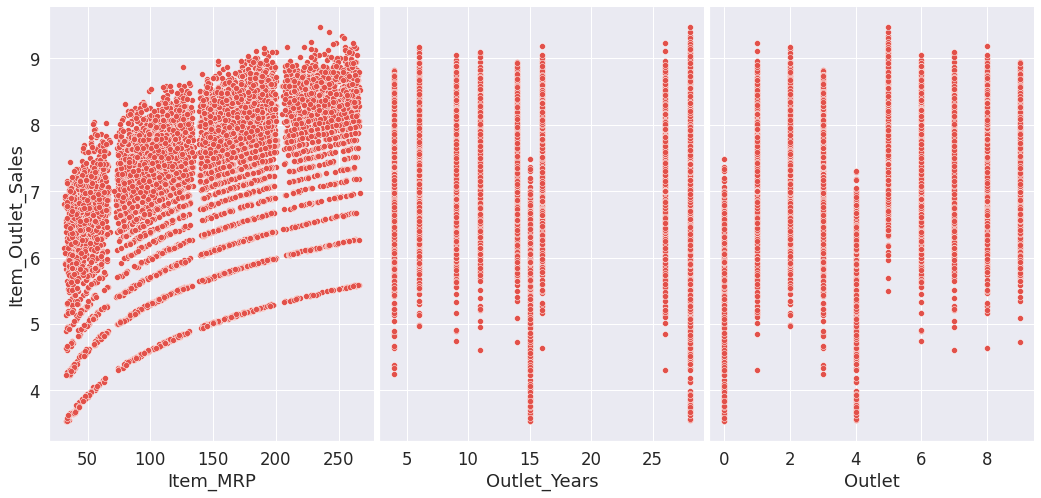

In [ ]:
p = sns.pairplot(df3, x_vars=['Item_MRP','Outlet_Years','Outlet'], y_vars=['Item_Outlet_Sales'], size=7, aspect=0.7)

**Model Fitting**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3[['Item_MRP',	'Outlet_Years',	'Outlet',	'Item_Fat_Content_1',	'Outlet_Size_0',	'Outlet_Size_1',	'Outlet_Location_Type_0',	'Outlet_Location_Type_1',	'Outlet_Type_0',	'Outlet_Type_3',	'New_Item_Type_0',	'New_Item_Type_1'	]], df3['Item_Outlet_Sales'], test_size = 0.2, random_state = 0)
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
print(y_pred)

[7.6349872  7.41039444 7.4519572  ... 8.4767295  4.85453253 8.91546769]


In [ ]:
train_score = lr.score(X_train, y_train)
print("Train Score: ", train_score)

Train Score:  0.7214465294815209


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("r2_score:", score)

r2_score: 0.7158697990219116


In [ ]:
from sklearn import metrics
print("Mean absolute error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error:  0.42214315796802265
Mean squared error:  0.30249441974873076
Root mean squared error:  0.5499949270209051


**Now check all the assumptions of linear regression**

Start with linear dependency.

In [ ]:
#checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df2[['Item_MRP',	'Outlet_Years',	'Outlet',	'Item_Fat_Content_1',	'Outlet_Size_0',	'Outlet_Location_Type_0',	'Outlet_Type_0',	'New_Item_Type_0'	]]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

                  Feature       VIF
0                Item_MRP  4.446204
1            Outlet_Years  7.704351
2                  Outlet  9.778531
3      Item_Fat_Content_1  1.240945
4           Outlet_Size_0  2.749254
5  Outlet_Location_Type_0  2.851293
6           Outlet_Type_0  2.587037
7         New_Item_Type_0  1.117645


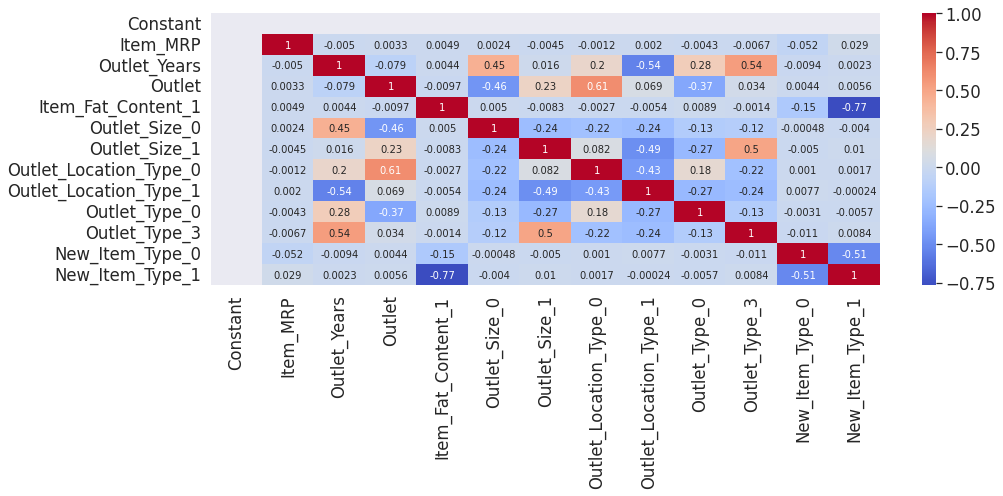

In [ ]:
#heatmap for multicollinearity
plt.figure(figsize=(15,5))
corr = df2.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [ ]:
#find the intercept
print("Intercept: ", lr.intercept_)

Intercept:  6.317501044992431


In [ ]:
#find the coefficients
print("Coefficient: ", lr.coef_)

Coefficient:  [ 0.00824887 -0.04546886  0.03275027  0.00894018  1.12711751 -0.06745063
  0.46457657  0.26325917 -1.24471014  1.72535681 -0.0208315   0.01189132]


Check for mean of residuals

In [ ]:
residuals = y_test.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.021838223255935346


In [ ]:
df4 = pd.DataFrame({'Actual' :y_test, 'Predicted' :y_pred, 'Variance' :y_test - y_pred})
df4.head()

,Actual,Predicted,Variance
4931,7.263430,7.634987,-0.371557
4148,7.092382,7.410394,-0.318013
7423,7.516040,7.451957,0.064082
4836,7.788154,7.565879,0.222276
944,7.346644,7.915993,-0.569349


Check for homoscedasticity

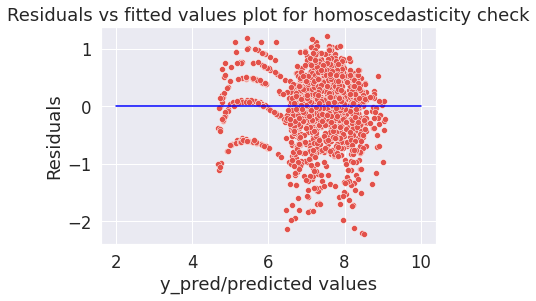

In [ ]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([2,10],[0, 0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
#wls model
mod_wls = sm.WLS(df3['Item_Outlet_Sales'], df3[['Item_MRP',	'Outlet_Years',	'Outlet',	'Item_Fat_Content_1',	'Outlet_Size_0',	'Outlet_Size_1',	'Outlet_Location_Type_0',	'Outlet_Location_Type_1',	'Outlet_Type_0',	'Outlet_Type_3',	'New_Item_Type_0',	'New_Item_Type_1'	]])
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.720
Model:                            WLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1993.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        05:10:14   Log-Likelihood:                -6791.3
No. Observations:                8523   AIC:                         1.361e+04
Df Residuals:                    8511   BIC:                         1.369e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Item_MRP                   0

In [ ]:
wls_pred = res_wls.predict(X_test)
print(wls_pred)

4931    7.625890
4148    7.405097
7423    7.441031
4836    7.557790
944     7.923127
          ...   
4644    7.143742
6179    5.922896
1861    8.486373
3598    4.846048
1523    8.916904
Length: 1705, dtype: float64


In [ ]:
residuals_wls = y_test.values - wls_pred
mean_res = np.mean(residuals_wls)
print("Mean of residuals: ", mean_res)

Mean of residuals:  -0.01768170884612966


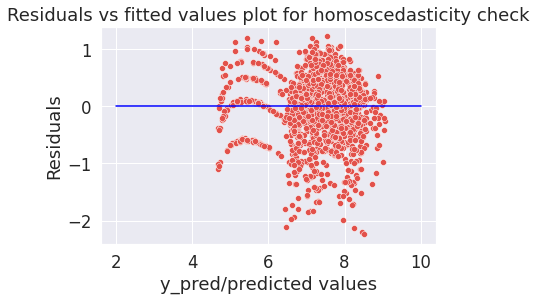

In [ ]:
p = sns.scatterplot(wls_pred,residuals_wls)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([2,10],[0, 0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
#import statsmodels.stats.api as sms
#from statsmodels.compat import lzip
#name = ['F statistic', 'p-value']
#test = sms.het_goldfeldquandt(residuals, X_test)
#lzip(name, test)

Check for normality of residuals

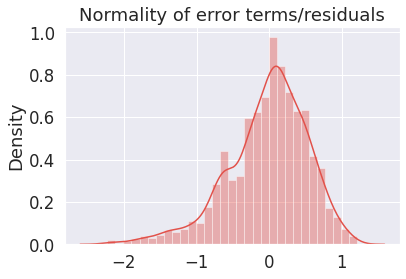

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Check for autocorrelation

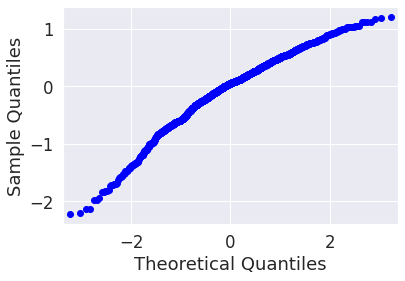

In [ ]:
q = sm.qqplot(residuals)

No autocorrelation in the data.